In [19]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
plt.rcParams['figure.figsize'] = (10,5)
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',150)
import sys,os
import json
import numpy as np
import re as re


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
input = pd.read_csv("spot_check_data.csv.bz2")

/Users/mani-lap/Applications/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,49,50,52,53,54,55,56,57,58,60,61,62,63,64,65,66,68,69,70,72,73,74,76,77,78,79,80,81,82,83,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


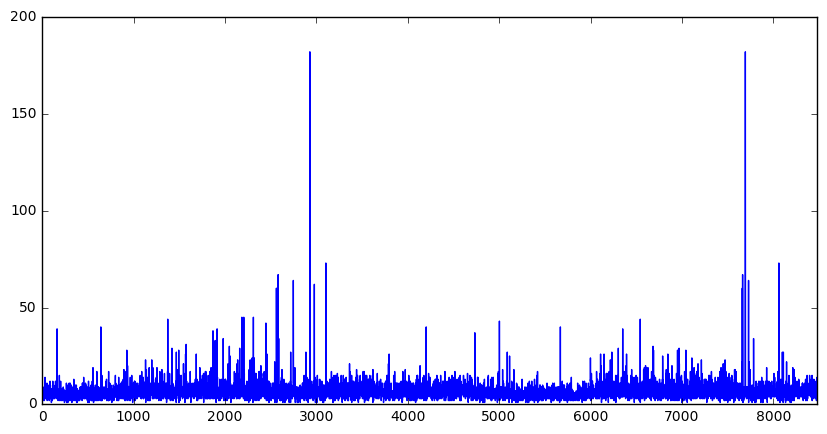

In [48]:
titles = input.title
words = titles.map(lambda title: len(re.sub(r"--|\s-\s|\s\s", "", re.sub(r'\sx\s', 'x', title)).split()))
words.plot()

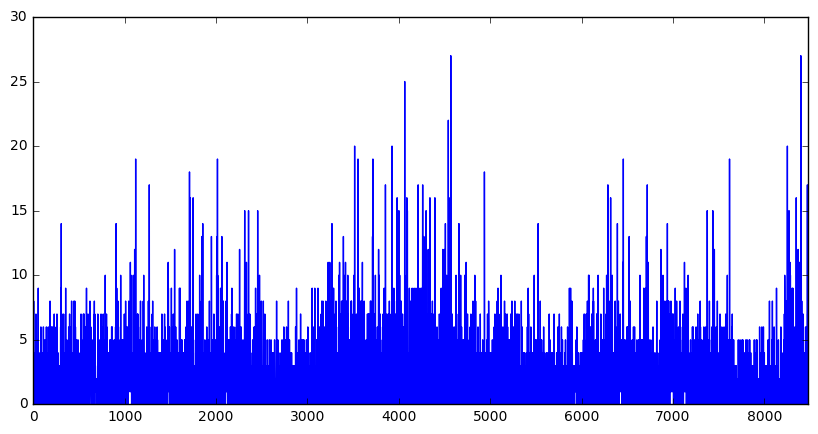

In [80]:
bc = input.breadCrumbs
words = lambda wr: len(re.sub(r"\s>\s|\s&\s", "", wr).split())
bc_words = bc.map(lambda b: 0 if type(b)==float else words(b))
bc_words.plot()

In [158]:
total_classified = input.categoryNamePath.dropna().count()
correct_count = len(pd.Series(input.categoryNamePath_status).where(lambda c: c == "Correct").dropna())
incorrect_count = len(pd.Series(input.categoryNamePath_status).where(lambda c: c == "Incorrect").dropna())
missed = len(pd.Series(input.categoryNamePath_status).where(lambda c: c == "Missed").dropna())
misclassified = total_classified - correct_count
"Misclassified count = " + str(misclassified)

'Misclassified count = 3460'

In [159]:
prob_of_misclassify = incorrect_count/total
"Probability = " + str(misclassified/total_classified)

'Probability = 0.407970758165'